# Task 4: Portfolio Optimization
## Modern Portfolio Theory Implementation

In [1]:
import sys
import os
path = os.path.abspath('../src')
if path not in sys.path:
    sys.path.append(path)

%reload_ext autoreload
%autoreload 2

from data_loader import DataLoader
from portfolio_optimizer import PortfolioOptimizer
import pandas as pd

In [2]:
# Load returns data
loader = DataLoader()
raw_data = loader.fetch_data()
returns_data,_ = loader.calculate(raw_data)

INFO:data_loader:DataLoader initialized with date range: 2015-07-01 to 2024-12-31
INFO:data_loader:Fetching data from Yahoo Finance...


g:\Courses\10 Academy\Week 11\Time-Series-Portfolio-Opt\src\data_loader.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(self.tickers, start=self.start_date, end=self.end_date)
[*********************100%***********************]  3 of 3 completed
INFO:data_loader:Successfully fetched 2391 rows of data
INFO:data_loader:Successfully calculated daily returns and volatility


In [3]:
# Portfolio optimization
optimizer = PortfolioOptimizer(returns_data)

# Find optimal portfolios
max_sharpe_weights = optimizer.optimize_portfolio('sharpe')
min_vol_weights = optimizer.optimize_portfolio('volatility')

assets = ['TSLA', 'BND', 'SPY']
print("Maximum Sharpe Ratio Portfolio:")
for i, asset in enumerate(assets):
    print(f"{asset}: {max_sharpe_weights[i]:.3f}")

print("\nMinimum Volatility Portfolio:")
for i, asset in enumerate(assets):
    print(f"{asset}: {min_vol_weights[i]:.3f}")

Maximum Sharpe Ratio Portfolio:
TSLA: 0.000
BND: 0.663
SPY: 0.337

Minimum Volatility Portfolio:
TSLA: 0.942
BND: 0.058
SPY: 0.000


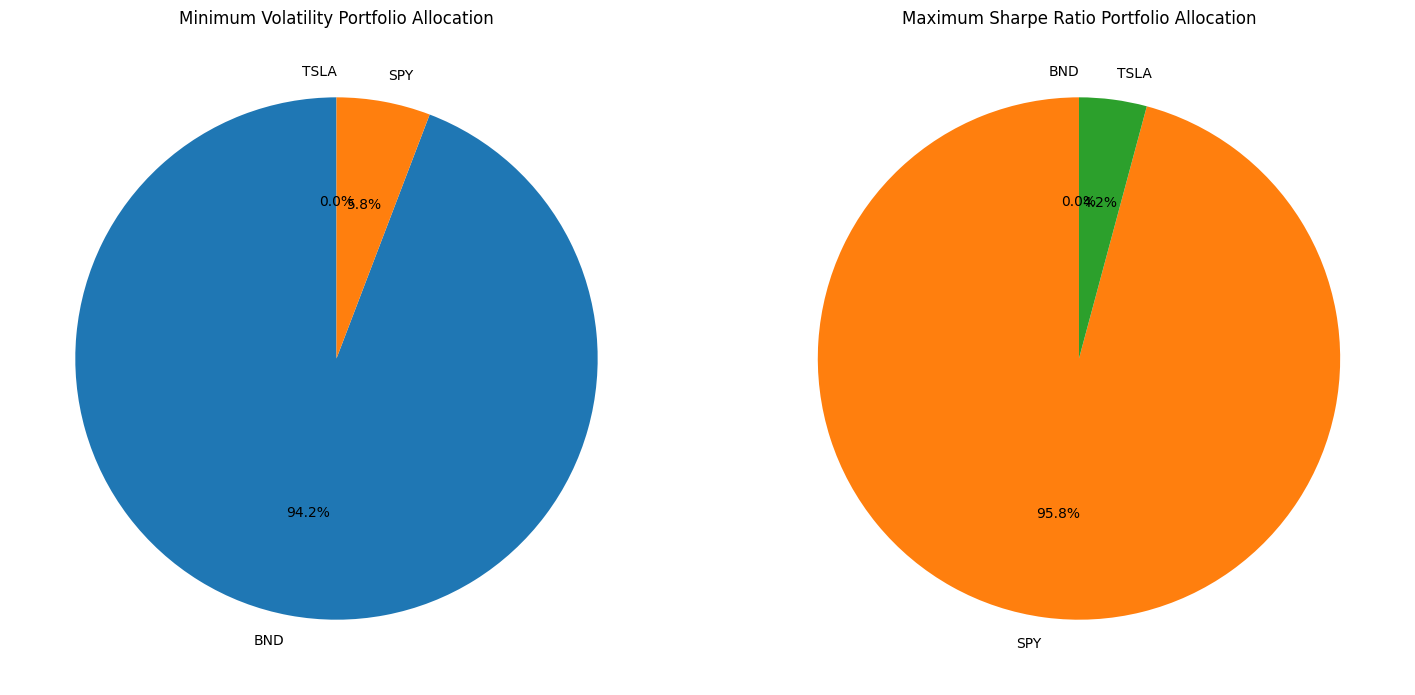

In [6]:
optimizer.plot_asset_allocations()

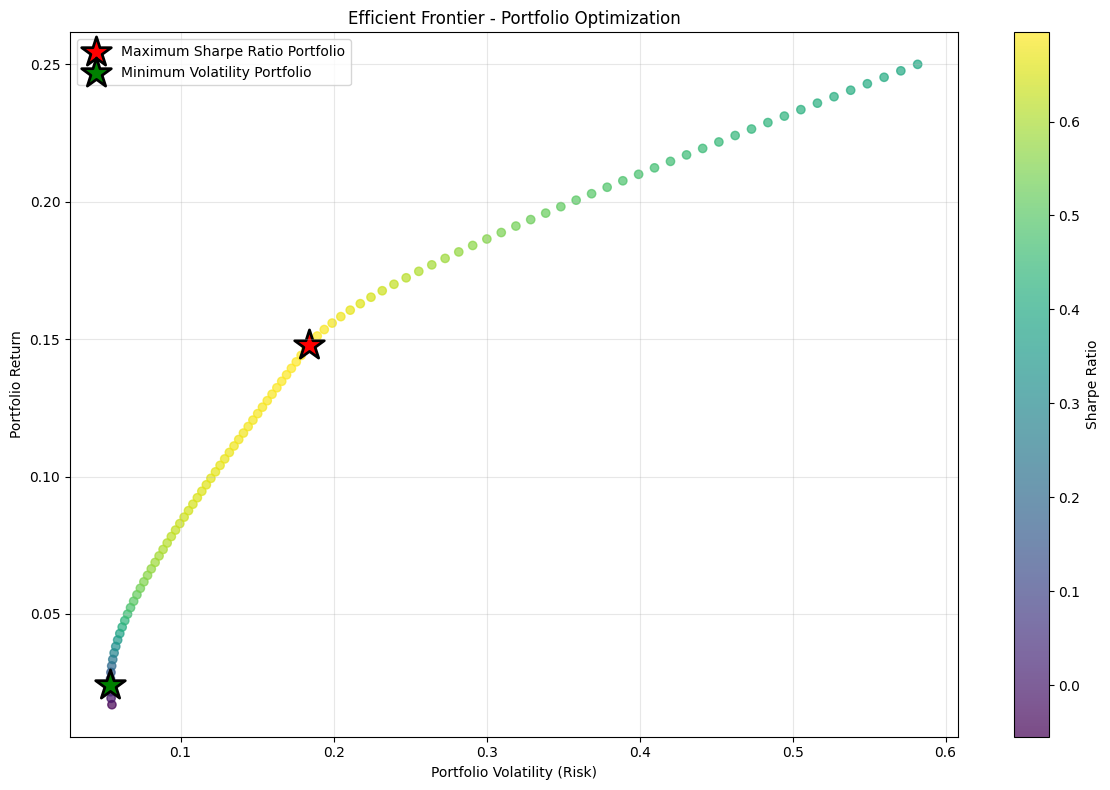

PORTFOLIO OPTIMIZATION RESULTS

Maximum Sharpe Ratio Analysis:
Expected Annual Return: 14.78%
Annual Volatility: 18.38%
Sharpe Ratio: 0.695
Asset Allocation:
  BND: 0.0%
  SPY: 95.8%
  TSLA: 4.2%

Minimum Volatility Analysis:
Expected Annual Return: 2.43%
Annual Volatility: 5.41%
Sharpe Ratio: 0.080
Asset Allocation:
  BND: 94.2%
  SPY: 5.8%
  TSLA: 0.0%

PORTFOLIO RECOMMENDATION

RECOMMENDED: Minimum Volatility Portfolio
Justification: Lower risk approach given modest Sharpe ratios

Final Portfolio Summary:

Recommended Analysis:
Expected Annual Return: 2.43%
Annual Volatility: 5.41%
Sharpe Ratio: 0.080
Asset Allocation:
  BND: 94.2%
  SPY: 5.8%
  TSLA: 0.0%


In [8]:
# Plot efficient frontier
max_sharpe_weights, min_vol_weights = optimizer.plot_efficient_frontier()
# Get portfolio recommendation
recommended_weights = optimizer.recommend_portfolio()